# Diana Angélica Martínez Hernández
# Alberto Isaac Pico Lara
## Proyecto final de Minería de Datos

#### Librerías necesarias para exploración y tratamiento de datos

In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display  import Audio
from sklearn import preprocessing

#### Ruta a los archivos de audio de cada uno de los géneros (Prog, Salsa, Electro) y creación de listas con los nombres de los archivos en cada ruta, así como una lista que contenga todas las pistas

In [33]:
ruta_prog = '..\prog'
pistas_p = os.listdir(ruta_prog)
ruta_salsa = '..\salsa'
pistas_s = os.listdir(ruta_salsa)
ruta_electro = '..\electronica'
pistas_e = os.listdir(ruta_electro)
pistas_unif = pistas_p + pistas_s + pistas_e
generos = ['prog', 'salsa', 'electronica']

In [34]:
print('# de pistas prog: ', len(pistas_p))
print('# de pistas de Salsa: ', len(pistas_s))
print('# de pistas de electro: ', len(pistas_e))
print('# total de pistas:', len(pistas_unif))

# de pistas prog:  130
# de pistas de Salsa:  130
# de pistas de electro:  130
# total de pistas: 390


### Ejemplos de análisis de una pista aleatoria por cada género

In [35]:
a = randint(0, 129)

In [36]:
samples_p, sr_p = librosa.load(ruta_prog + '\\' + pistas_p[a], sr = None, mono = True, offset = 0.0, duration = None)
samples_s, sr_s = librosa.load(ruta_salsa + '\\' + pistas_s[a], sr = None, mono = True, offset = 0.0, duration = None)
samples_e, sr_e = librosa.load(ruta_electro + '\\' + pistas_e[a], sr = None, mono = True, offset = 0.0, duration = None)

d:\desarrollo\python\virtualpythonprincipal\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [37]:
print('Tamaño de muestreo (samples) prog: ', len(samples_p))
print('Tasa de muestreo (sampling rate) prog: ', sr_p)
print('Tamaño de muestreo (samples) salsa: ', len(samples_s))
print('Tasa de muestreo (sampling rate) salsa: ', sr_s)
print('Tamaño de muestreo (samples) electro: ', len(samples_e))
print('Tasa de muestreo (sampling rate) electro: ', sr_e)

Tamaño de muestreo (samples) prog:  2646144
Tasa de muestreo (sampling rate) prog:  44100
Tamaño de muestreo (samples) salsa:  2641536
Tasa de muestreo (sampling rate) salsa:  44100
Tamaño de muestreo (samples) electro:  2640384
Tasa de muestreo (sampling rate) electro:  44100


#### Pistas cargadas

In [38]:
print(pistas_p[a])

08 Termites_02m_00s__03m_00s.mp3


In [39]:
Audio(ruta_prog + '\\' + pistas_p[a])

Text(0.5, 1.0, '08 Termites_02m_00s__03m_00s.mp3')

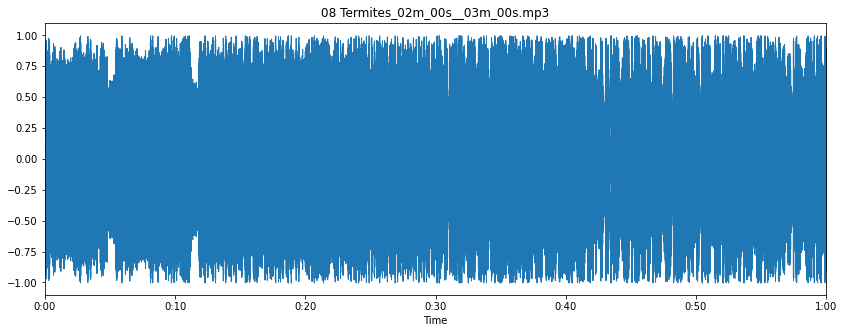

In [40]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_p, sr = sr_p)
plt.title(pistas_p[a])

Text(0.5, 1.0, '08 Termites_02m_00s__03m_00s.mp3')

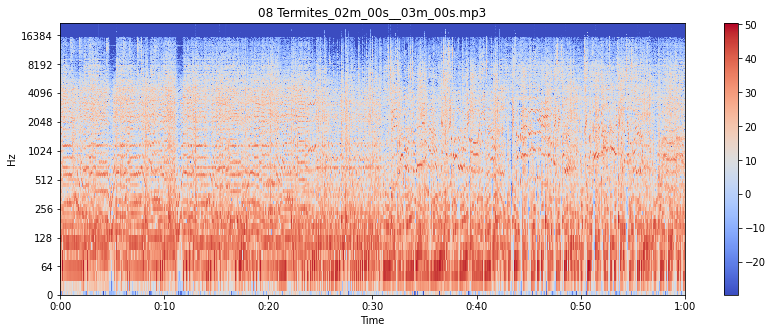

In [41]:
X = librosa.stft(samples_p)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_p, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_p[a])

In [42]:
print(pistas_s[a])

FRIO EN MI-ALFA 8_01m_00s__02m_00s.mp3


In [43]:
Audio(ruta_salsa + '\\' + pistas_s[a])

Text(0.5, 1.0, 'FRIO EN MI-ALFA 8_01m_00s__02m_00s.mp3')

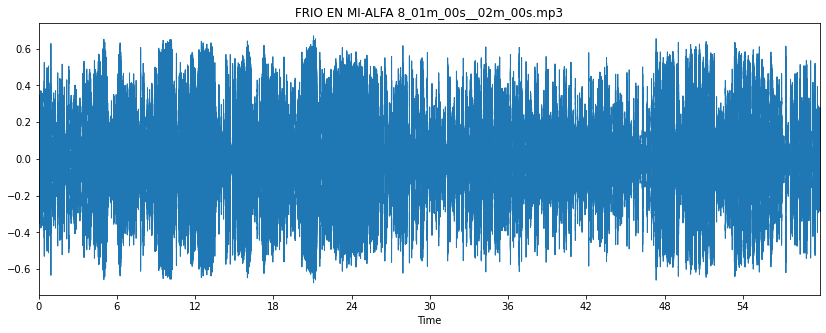

In [44]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_s, sr = sr_s)
plt.title(pistas_s[a])

Text(0.5, 1.0, 'FRIO EN MI-ALFA 8_01m_00s__02m_00s.mp3')

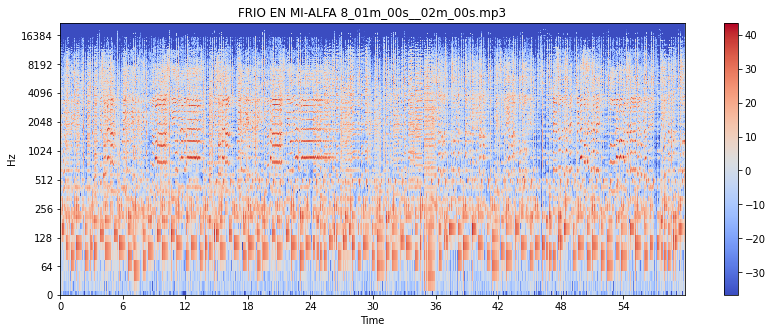

In [45]:
X = librosa.stft(samples_s)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_s, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_s[a])

In [46]:
print(pistas_e[a])

Play Hard_01m_00s__02m_00s.mp3


In [47]:
Audio(ruta_electro + '\\' + pistas_e[a])

Text(0.5, 1.0, 'Play Hard_01m_00s__02m_00s.mp3')

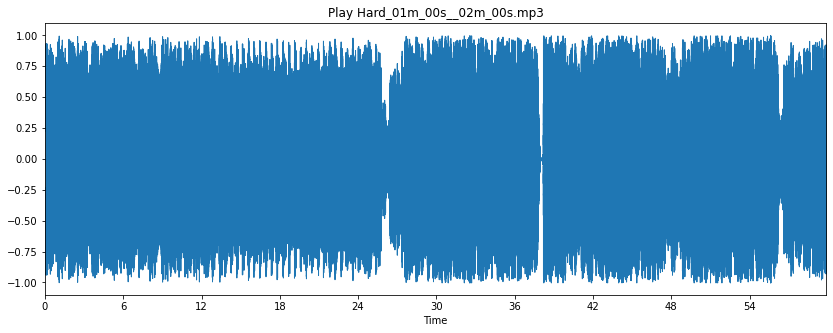

In [48]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_e, sr = sr_e)
plt.title(pistas_e[a])

Text(0.5, 1.0, 'Play Hard_01m_00s__02m_00s.mp3')

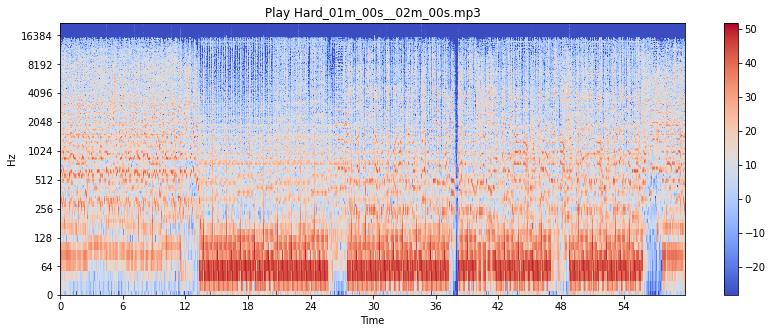

In [49]:
X = librosa.stft(samples_e)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_e, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_e[a])

### Selección de características ejemplo
Algunas de las caracerísticas que se pueden extraer del audio son las siguientes:
#### Característica espectrales del audio
- Zero crossing rate: tasa de cambios de signo a través de una señal
- Spectral centroid: Indica en donde está el "centro de masa" (mayor sendidad de muestras) de una pista de audio
- Spectrall Rolloff: La medida de la forma de la señal, representa la frecuencia de la señal debajo de un porcentaje especifico, se trabajará con el 100%
- Mel Frecuency cepstral coeficients: los MFCC de una señal son sunconjuntos de características que describen de manera concisa la forma general del espectro. Esta técnica se usa para el análisis de la voz humana 
- Chroma frecuencies: Representación de los 12 semitonos que existen en la octava musical
#### Características rítmicas
- Tempograma: Estimación de los BPM de cada pista

En las siguientes líneas se muestra con una pista ejemplo la extracción y visualización de una pista, más adelante se les hará la extracción a las 390 pistas que forman parte del conjunto de datos elegido.

Text(0.5, 1.0, '08 Termites_02m_00s__03m_00s.mp3')

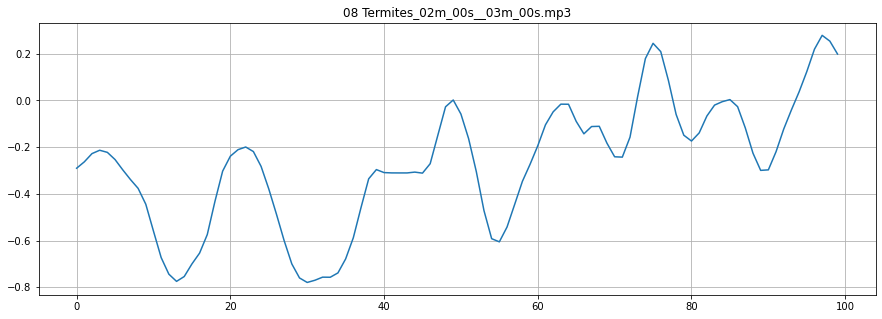

In [50]:
#Zero crossing rate
n0 = 9000
n1 = 9100
plt.figure(figsize=(15, 5))
plt.plot(samples_p[n0:n1])
plt.grid()
plt.title(pistas_p[a])

A simple vista se aprecian 3 cruces con el 0, se verifica con la lbrería librosa

In [51]:
zero_crossings= librosa.zero_crossings(samples_p[n0:n1], pad=False)
print(np.mean(zero_crossings))
print(sum(zero_crossings))

samples_p

0.07
7


array([0.        , 0.        , 0.        , ..., 0.08894348, 0.15589905,
       0.21385193], dtype=float32)

In [52]:
#spectral centroid, calcula el crentoide espectral para cada cuadro de la señal
spectral_centroids = librosa.feature.spectral_centroid(samples_p, sr=sr_p)[0]
spectral_centroids.shape

(5169,)

In [53]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [54]:
def normalize(x, axis = 0):
    return preprocessing.minmax_scale(x, axis = axis)

Text(0.5, 1.0, '08 Termites_02m_00s__03m_00s.mp3')

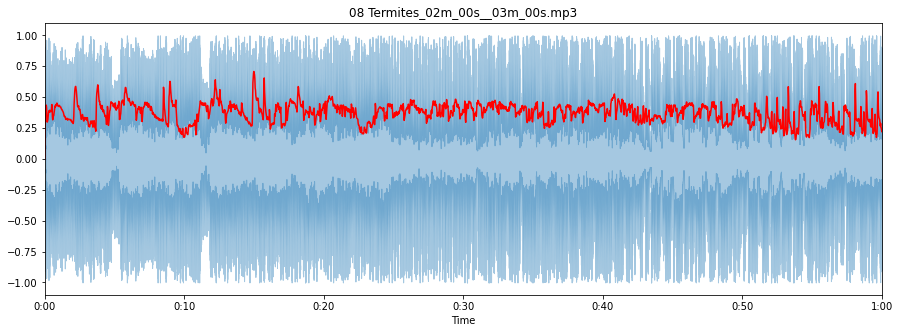

In [55]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(samples_p, sr=sr_p, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title(pistas_p[a])

Text(0.5, 1.0, '08 Termites_02m_00s__03m_00s.mp3')

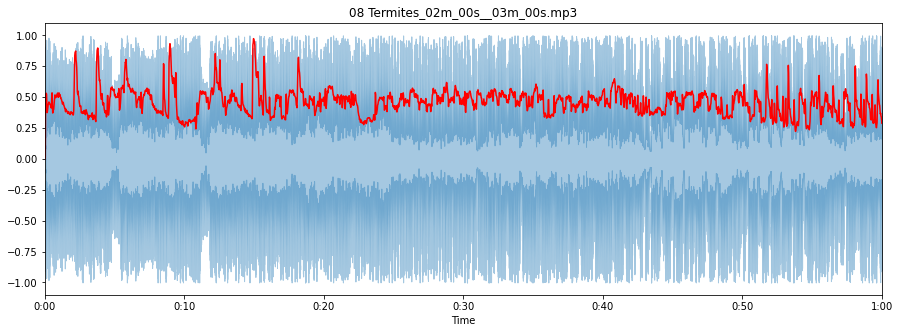

In [56]:
#spectral rolloff
spr = librosa.feature.spectral_rolloff(samples_p+0.01, sr = sr_p)[0]
plt.figure(figsize=(15, 5))
librosa.display.waveplot(samples_p, sr = sr_p, alpha = 0.4)
plt.plot(t, normalize(spr), color = 'r')
plt.title(pistas_p[a])

In [57]:
#MFCC
mfccs = librosa.feature.mfcc(samples_p, sr = sr_p)
mfccs.shape

(20, 5169)

In [58]:
#20 MFCC en 5,171 cuadros

Text(0.5, 1.0, '08 Termites_02m_00s__03m_00s.mp3')

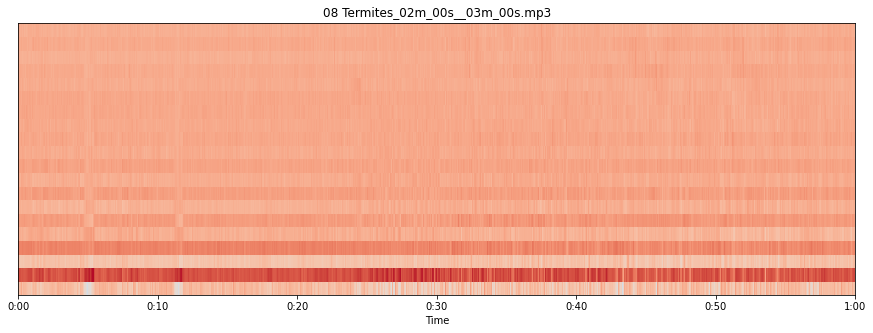

In [59]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, sr=sr_p, x_axis='time')
plt.title(pistas_p[a])

Text(0.5, 1.0, '08 Termites_02m_00s__03m_00s.mp3')

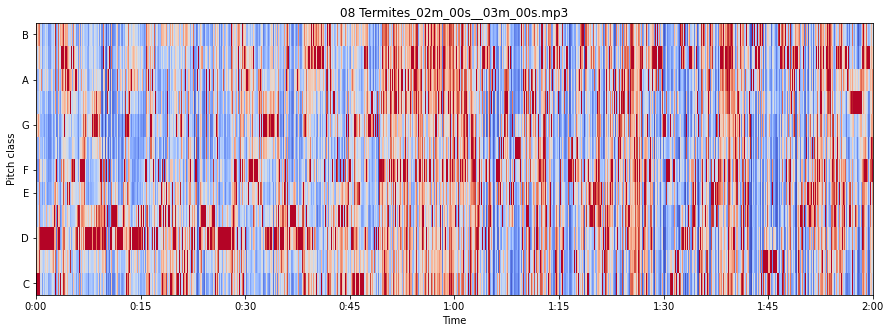

In [60]:
#Chroma frecuencies: representación de la escala cromática en 12 semitonos
salto = 512
cromatica = librosa.feature.chroma_stft(samples_p, sr=sr_p, hop_length=salto)
plt.figure(figsize=(15, 5))
librosa.display.specshow(cromatica, x_axis='time', y_axis='chroma', hop_length=salto, cmap='coolwarm')
plt.title(pistas_p[a])

In [114]:
%%time
#Temmpograma
hop_length = 512
env = librosa.onset.onset_strength(y = samples_p, sr = sr_p, hop_length = hop_length)
tempograma = librosa.feature.tempogram(onset_envelope = env, sr = sr_p, hop_length = hop_length)

auto_c = librosa.autocorrelate(env, max_size = tempograma.shape[0])
auto_c = librosa.util.normalize(auto_c)

#mostrar los "beats"
tempo = librosa.beat.tempo(onset_envelope = env, sr = sr_p, hop_length = hop_length)[0]
print(tempo)
print(auto_c.shape)
print(np.mean(auto_c))

147.65625
(384,)
0.6765584305208798
Wall time: 1.92 s


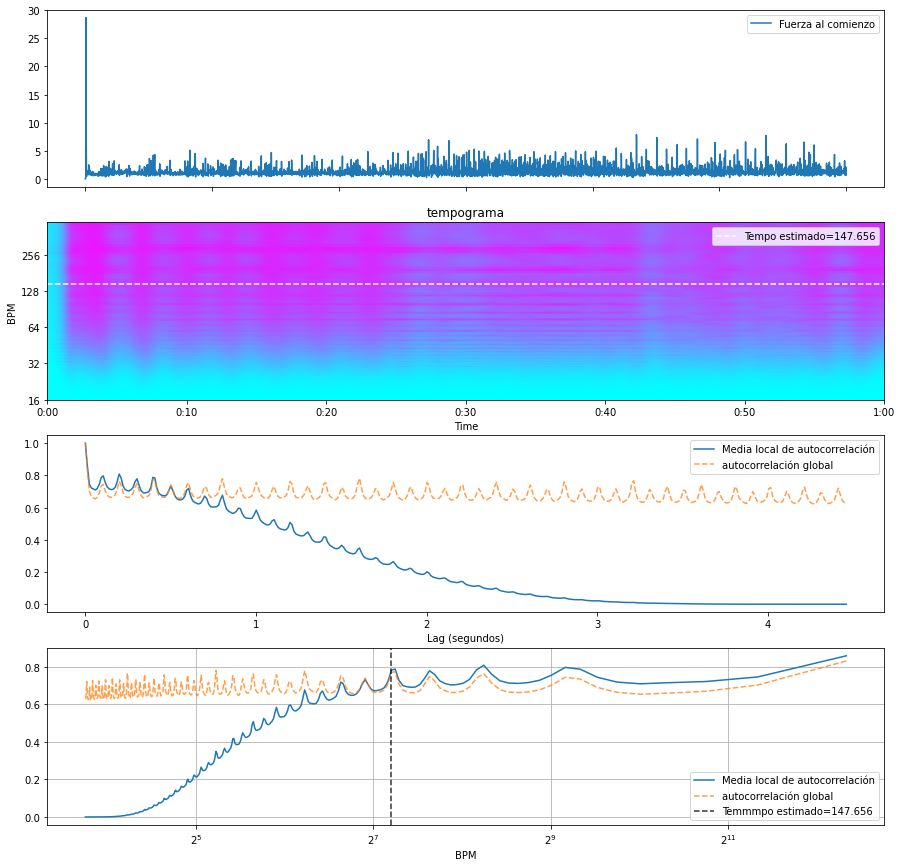

In [62]:
fig, ax = plt.subplots(nrows=4, figsize=(15, 15))
tiempos = librosa.times_like(env, sr=sr_p, hop_length=hop_length)
ax[0].plot(tiempos, env, label='Fuerza al comienzo')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempograma, sr=sr_p, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='cool',ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,label='Tempo estimado={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='tempograma')
x = np.linspace(0, tempograma.shape[0] * float(hop_length) / sr_p,num=tempograma.shape[0])
ax[2].plot(x, np.mean(tempograma, axis=1), label='Media local de autocorrelación')
ax[2].plot(x, auto_c, '--', alpha=0.75, label='autocorrelación global')
ax[2].set(xlabel='Lag (segundos)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempograma.shape[0], hop_length=hop_length, sr=sr_p)
ax[3].semilogx(freqs[1:], np.mean(tempograma[1:], axis=1),label='Media local de autocorrelación', basex=2)
ax[3].semilogx(freqs[1:], auto_c[1:], '--', alpha=0.75,label='autocorrelación global', basex=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,label='Temmmpo estimado={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

Text(0.5, 1.0, 'tempograma de 08 Termites_02m_00s__03m_00s.mp3')

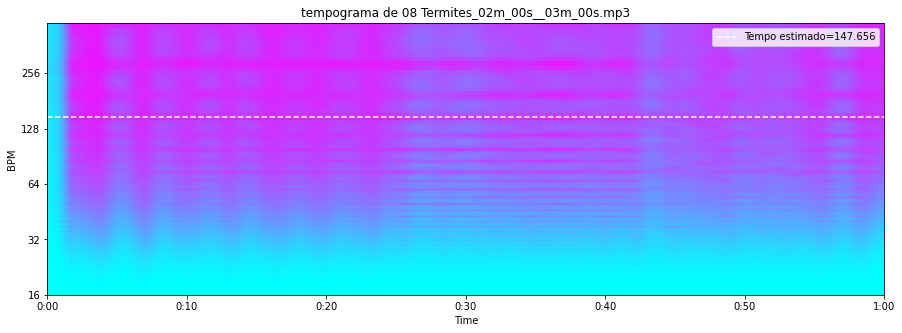

In [64]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(tempograma, sr=sr_p, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='cool')
plt.axhline(tempo, color='w', linestyle='--', alpha=1,label='Tempo estimado={:g}'.format(tempo))
plt.legend(loc='upper right')
plt.title('tempograma de ' + pistas_p[a])

## Extraer expectrograma de cada canción

In [4]:
import pathlib

In [229]:
colores = plt.get_cmap('cool')
plt.figure(figsize=(20, 8))

for i in generos:
    pathlib.Path(f'..\espectrogramas\{i}').mkdir(parents = True, exist_ok = True)
    for nombre in os.listdir(f'..\{g}'):
        cancion = f'..\{g}\{nombre}'
        samples, sr = librosa.load(cancion, sr = None, mono = True, offset = 0.0, duration = None)
        X = librosa.stft(samples)
        Xdb = librosa.amplitude_to_db(abs(X))
        librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
        plt.title(pista)
        plt.savefig(f'..\espectrogramas\{i}' + pista + '.png')
        plt.clf()
"""    
for pista in pistas_s:
    samples, sr = librosa.load( '..\\salsa\\' + pista , sr = None, mono = True, offset = 0.0, duration = None)
    X = librosa.stft(samples)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.title(pista)
    plt.savefig(f'..\espectrogramas\\salsa\\' + pista + '.png')
    plt.clf()

for pista in pistas_e:
    samples, sr = librosa.load( '..\\electronica\\' + pista , sr = None, mono = True, offset = 0.0, duration = None)
    X = librosa.stft(samples)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.title(pista)
    plt.savefig(f'..\espectrogramas\\electronica\\' + pista + '.png')
    plt.clf()
"""

<Figure size 1440x576 with 0 Axes>

## Extraer características de cada canción

In [115]:
#generar lista para el nombre de la cabecera de manera automática
columnas = ['archivo' ,'zero_cr', 'zero_crossings_m' ,'spectral_centroid', 'spectral_bw' ,'spectral_rf', 'croma']
for x in range(1, 21):
    columnas.append(f'mfcc_{x}')
columnas.append('BPM')
columnas.append('auto_c')
columnas.append('genero')
columnas

['archivo',
 'zero_cr',
 'zero_crossings_m',
 'spectral_centroid',
 'spectral_bw',
 'spectral_rf',
 'croma',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'mfcc_14',
 'mfcc_15',
 'mfcc_16',
 'mfcc_17',
 'mfcc_18',
 'mfcc_19',
 'mfcc_20',
 'BPM',
 'auto_c',
 'genero']

In [116]:
%%time
df = pd.DataFrame(columns = columnas)
for g in generos:
    for nombre in os.listdir(f'..\{g}'):
        cancion = f'..\{g}\{nombre}'
        samples, sr = librosa.load(cancion, sr = None, mono = True, offset = 0.0, duration = None)
        nombre = nombre.replace(' ', '')
        fft = np.mean(librosa.stft(samples))
        zero_crossings = librosa.zero_crossings(samples[n0:n1], pad=False)
        zero_crossings = sum(zero_crossings)
        zero_crossings_m = np.mean(librosa.zero_crossings(samples[n0:n1], pad=False))
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y = samples, sr = sr))
        spectral_bw = np.mean(librosa.feature.spectral_bandwidth(y = samples, sr = sr))
        spectral_rf = np.mean(librosa.feature.spectral_rolloff(y = samples, sr = sr))
        croma = np.mean(librosa.feature.chroma_stft(y = samples, sr = sr))
        mfcc = librosa.feature.mfcc(y = samples, sr = sr)
        env = librosa.onset.onset_strength(y = samples, sr = sr, hop_length = hop_length)
        tempograma = librosa.feature.tempogram(onset_envelope = env, sr = sr, hop_length = hop_length)
        auto_c = librosa.autocorrelate(env, max_size = tempograma.shape[0])
        auto_c = librosa.util.normalize(auto_c)
        auto_c = np.mean(auto_c)
        BPM = librosa.beat.tempo(onset_envelope = env, sr = sr, hop_length = hop_length)[0]
        x = f'{nombre} {zero_crossings} {zero_crossings_m} {spectral_centroid} {spectral_bw} {spectral_rf} {croma}'
        for m in mfcc:
            x += f' {np.mean(m)}'
        x += f' {BPM} {auto_c} {g}'
        d = dict(zip(columnas, x.split()))
        df = df.append(d, ignore_index = True)

d:\desarrollo\python\virtualpythonprincipal\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


KeyboardInterrupt: 

In [117]:
df.head()

archivo zero_cr zero_crossings_m  \
0          01-TheMountain_02m_00s__03m_00s.mp3       6             0.06   
1  01ANightmareToRemember_02m_00s__03m_00s.mp3       4             0.04   
2              01AcidRain_02m_00s__03m_00s.mp3       5             0.05   
3          01BalrogBoogie_02m_00s__03m_00s.mp3       2             0.02   
4            01C'estlaVie_02m_00s__03m_00s.mp3       5             0.05   

    spectral_centroid         spectral_bw         spectral_rf  \
0   2358.978043758319  2552.8238898513264  4793.5268019080095   
1  3100.6891087621593  3256.5788678008535    6469.36399192426   
2  3198.3783547564176   3543.702522135936  6808.5705403456905   
3  2942.0118684964236  3163.9039897214457   6050.917526832334   
4  3123.7432387208128   3337.527859022324   6499.844645512913   

                 croma               mfcc_1              mfcc_2  \
0  0.47042009234428406  -163.37283325195312    165.717529296875   
1   0.5962012410163879   -48.06243896484375  135.74339294433594   
2   0.5460786819458008   -58.24441909790039  134.54954528808594   
3  0.43332982063293457   -91.08263397216797  134.39129638671875   
4   0.5357300639152527    -34.4483528137207   137.7799835205078   

               mfcc_3  ...             mfcc_14             mfcc_15  \
0  -50.69720458984375  ...  3.4199140071868896   1.201207160949707   
1   -53.9320068359375  ...   5.244627952575684  1.3308080434799194   
2  -35.38487243652344  ...  4.5937981605529785  1.4717448949813843   
3  -46.59893035888672  ...  2.3956925868988037  1.1478973627090454   
4  -48.76754379272461  ...   3.280221939086914   3.242964267730713   

               mfcc_16               mfcc_17              mfcc_18  \
0  -3.6727993488311768    1.4974801540374756  0.18649642169475555   
1  -2.6823527812957764     0.532446563243866  -1.8626456260681152   
2   0.7395901083946228    0.7280769348144531   -4.671610355377197   
3   1.2898205518722534  -0.10106165707111359   -4.962540626525879   
4  -4.1313395500183105    1.9125590324401855   -6.067164897918701   

              mfcc_19              mfcc_20                 BPM  \
0  0.5117252469062805   -5.180268287658691          123.046875   
1   1.804187297821045   -5.636508941650391  109.95678191489361   
2  3.4586408138275146  -1.7552181482315063         143.5546875   
3  3.0511910915374756  -2.8586840629577637   90.66611842105263   
4   2.728407859802246   -6.114750862121582  120.18531976744185   

               auto_c genero  
0   0.772140086053875   prog  
1  0.6285460543854122   prog  
2  0.5419584797639031   prog  
3  0.5415280364214626   prog  
4  0.7460782029998989   prog  

[5 rows x 30 columns]

In [118]:
df.to_csv('..\\data_set\\datos_musica.csv', sep = ',', encoding = 'utf8')

In [119]:
df.shape

(17, 30)

Wall time: 109 ms
